In [1]:
import sys
sys.path.append(r'D:\Python ML\SA-geochemical-maps\src')
import cartopy.crs as ccrs
from matplotlib.colors import BoundaryNorm, LogNorm
import matplotlib.pyplot as plt
import matplotlib as mpl


import create_chem_dataset as ccd
import max_dh_chem as mdc
from interpolation import MapBase, interpolate

import pandas as pd
import numpy as np

In [2]:
source_path = r'D:\Unearthed_SARIG_Data_Package\SARIG_Data_Package\sarig_rs_chem_exp.csv'
out_path = r'D:\Python ML\SA-geochemical-maps\Data\Processed_2'
drill_hole_spatial = r'D:\Python ML\SA-geochemical-maps\Data\interim\DH_data.csv'
method_path = r'D:\Python ML\SA-geochemical-maps\notebooks\chem_method_code_map.csv'


In [3]:
elements = ['Fe2O3','U','Ag','Pb','Cu','Zn','Co','Li','Ni','Fe','NiO', 'U3O8', 'Au', 'FeO', 'CoO']

element = 'Au'

In [4]:
clean_Au = ccd.create_dh_chem_data(source_path, element, method_path, out_path)


Need to remove spurious samples and holes as determined during the EDA phase, before determining max DH value

In [5]:
clean_Au.drop(clean_Au[clean_Au.DETERMINATION.str.contains(r'unknown', na=False, regex=False)].index, inplace=True)
clean_Au.drop(clean_Au[clean_Au.DETERMINATION.str.contains(r'UKN', na=False, regex=False)].index, inplace=True)
clean_Au.drop(clean_Au[clean_Au.DETERMINATION.str.contains(r'pXRF', na=False, regex=False)].index, inplace=True)
clean_Au.drop(clean_Au[clean_Au.DETERMINATION.str.contains(r'N/S', na=False, regex=False)].index, inplace=True)
clean_Au.drop(clean_Au[clean_Au.SAMPLE_NO == 1771825].index, inplace=True)
clean_Au.drop(clean_Au[clean_Au.SAMPLE_NO == 1756688].index, inplace=True)
clean_Au.drop(clean_Au[clean_Au.SAMPLE_NO == 1742451].index, inplace=True)

In [6]:
norm_data = mdc.max_dh_chem(clean_Au, drill_hole_spatial)

In [7]:
clean_Au.head()

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,UNIT,CHEM_METHOD_CODE,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION
2348,2071235,DC,280141.0,201.00,201.30,1629666,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,0.76,ppm,FA50/AAS,0,0.76,AAS,FA,unknown
2349,2071236,DC,280141.0,201.30,202.00,1629667,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,104.33,ppm,FA50/AAS,0,104.33,AAS,FA,unknown
2361,2071237,DC,280141.0,202.00,202.25,1629668,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,12.91,ppm,FA50/AAS,0,12.91,AAS,FA,unknown
2373,2071238,DC,280141.0,202.25,203.00,1629669,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,0.96,ppm,FA50/AAS,0,0.96,AAS,FA,unknown
2385,2071239,DC,280141.0,203.00,204.00,1629670,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,1.16,ppm,FA50/AAS,0,1.16,AAS,FA,unknown


In [8]:
norm_data['times_ave_crustal_abund'] = norm_data.converted_ppm.apply(lambda x: x / 0.0013)

In [9]:
norm_data.head()

,SAMPLE_NO,SAMPLE_SOURCE_CODE,DRILLHOLE_NUMBER,DH_DEPTH_FROM,DH_DEPTH_TO,SAMPLE_ANALYSIS_NO,ANALYSIS_TYPE_DESC,LABORATORY,CHEM_CODE,VALUE,...,BDL,converted_ppm,DETERMINATION,DIGESTION,FUSION,DH_NAME,SITE_NO,LONGITUDE_GDA2020,LATITUDE_GDA2020,times_ave_crustal_abund
0,1299253,CT,219726.0,123.0,124.0,888194,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,0.01,...,1,0.00001,AAS,FA,unknown,KTRC096,1131734,139.002685,-35.093696,0.007692
1,2080446,CT,148.0,302.0,304.0,1637265,GEOCHEMISTRY,"Comlabs Pty Ltd, S.A.",Au,0.05,...,1,0.00001,AAS,N/S,unknown,BN 1,182,129.166978,-31.168831,0.007692
2,658067,CT,200657.0,16.0,20.0,282099,GEOCHEMISTRY,"AMDEL Laboratory, S.A.",Au,11.00,...,0,0.00110,AAS,AR,unknown,BG 82,825352,134.461854,-30.774370,0.846154
3,1687225,CALC,246618.0,0.2,0.2,1268144,GEOCHEMISTRY,"Genalysis Laboratory Services Pty Ltd, W.A.",Au,1.00,...,1,0.00001,ICP-MS,AR,unknown,MI818,1487788,136.062790,-32.224066,0.007692
4,2941105,HCORE,332802.0,148.0,149.0,2448616,GEOCHEMISTRY,"ALS Chemex, Adelaide SA",Au,0.01,...,0,0.01000,AAS,AR,unknown,HDD-342,2125394,137.872297,-34.541513,7.692308


In [10]:
norm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245815 entries, 0 to 245814
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SAMPLE_NO                245815 non-null  int64  
 1   SAMPLE_SOURCE_CODE       245806 non-null  object 
 2   DRILLHOLE_NUMBER         245815 non-null  float64
 3   DH_DEPTH_FROM            245671 non-null  float64
 4   DH_DEPTH_TO              245483 non-null  float64
 5   SAMPLE_ANALYSIS_NO       245815 non-null  int64  
 6   ANALYSIS_TYPE_DESC       245815 non-null  object 
 7   LABORATORY               239266 non-null  object 
 8   CHEM_CODE                245815 non-null  object 
 9   VALUE                    245815 non-null  float64
 10  UNIT                     245815 non-null  object 
 11  CHEM_METHOD_CODE         245815 non-null  object 
 12  BDL                      245815 non-null  int64  
 13  converted_ppm            245815 non-null  float64
 14  DETE

In [11]:
norm_data.loc[norm_data['converted_ppm'].idxmax()]

SAMPLE_NO                                                            1739017
SAMPLE_SOURCE_CODE                                                        DC
DRILLHOLE_NUMBER                                                    255104.0
DH_DEPTH_FROM                                                         992.95
DH_DEPTH_TO                                                            993.3
SAMPLE_ANALYSIS_NO                                                   1330185
ANALYSIS_TYPE_DESC                                              GEOCHEMISTRY
LABORATORY                 In-house determinations by originating explora...
CHEM_CODE                                                                 Au
VALUE                                                                2820.87
UNIT                                                                     ppm
CHEM_METHOD_CODE                                                         PAL
BDL                                                                        0

In [12]:
norm_data.times_ave_crustal_abund.min()

7.692307692307693e-05

In [13]:
max_v, min_v = norm_data.times_ave_crustal_abund.max().astype(int), norm_data.times_ave_crustal_abund.min().astype(int) 
print(f'For the element {element}: the max value range is {max_v}, while the min is {min_v}')

proj = ccrs.epsg(3107)   #GDA 94/SA Lambert
levels = list(range(min_v, max_v, 1))
cmap = plt.get_cmap('plasma')
#norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
log_norm = LogNorm()
n_dh = len(norm_data.DRILLHOLE_NUMBER)

For the element Au: the max value range is 2169900, while the min is 0


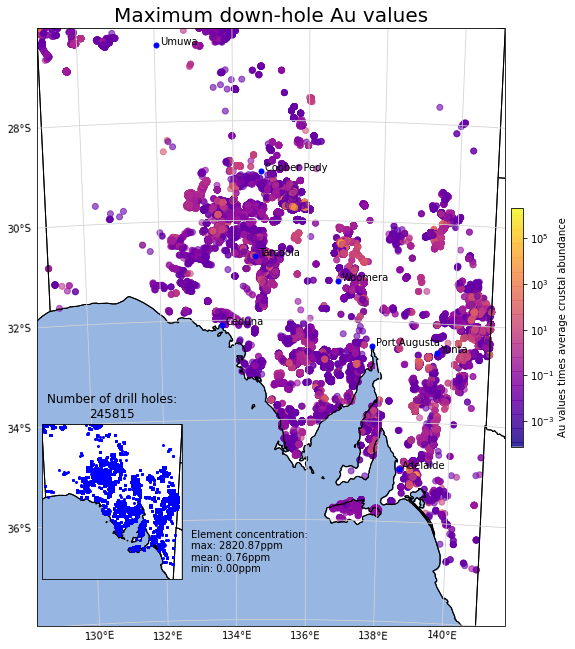

In [14]:
mpl.rcParams['agg.path.chunksize'] = 10000

title = f'Maximum down-hole {element} values'
label = f'{element} values times average crustal abundance'
out_fig = out_path+'\\'+f'Max_downhole_{element}.jpg'
inset_title = f'Number of drill holes:\n{n_dh}'
x, y = norm_data.LONGITUDE_GDA2020.values, norm_data.LATITUDE_GDA2020.values
max_val, min_val, mean_val = norm_data.converted_ppm.max(), norm_data.converted_ppm.min(), norm_data.converted_ppm.mean()
annot = f'Element concentration:\nmax: {max_val:.2f}ppm\nmean: {mean_val:.2f}ppm\nmin: {min_val:.2f}ppm'

fig, view, inset = MapBase(proj, title, inset_title)
plot = view.scatter(x, y, c=norm_data.times_ave_crustal_abund, cmap=cmap, norm=log_norm, alpha=0.6, transform=ccrs.PlateCarree())
fig.colorbar(plot, ax=view, shrink=.4, pad=0.01, label=label) #boundaries=levels, 
inset.plot(x, y,color='blue', marker='o', markersize=2, linestyle='None', transform=ccrs.Geodetic())
    
view.annotate(text=annot, xy=(0.33,0.09), xycoords='axes fraction')
plt.savefig(out_fig, dpi=300, bbox_inches='tight')
plt.show()

In [15]:
gx, gy, img = interpolate(norm_data, proj)

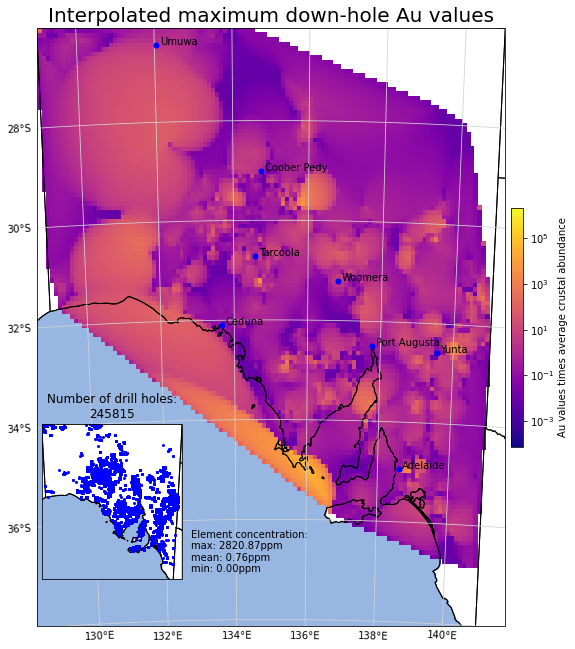

In [16]:
title = f'Interpolated maximum down-hole {element} values'
label = f'{element} values times average crustal abundance'
out_fig = out_path+'\\'+f'Interp_Max_downhole_{element}.jpg'
inset_title = f'Number of drill holes:\n{n_dh}'
x, y = norm_data.LONGITUDE_GDA2020.values, norm_data.LATITUDE_GDA2020.values
max_val, min_val, mean_val = norm_data.converted_ppm.max(), norm_data.converted_ppm.min(), norm_data.converted_ppm.mean()
annot = f'Element concentration:\nmax: {max_val:.2f}ppm\nmean: {mean_val:.2f}ppm\nmin: {min_val:.2f}ppm'

fig, view, inset = MapBase(proj, title, inset_title)
mmb = view.pcolormesh(gx, gy, img, cmap=cmap, norm=log_norm)
fig.colorbar(mmb, ax=view, shrink=.4, pad=0.01, label=label) #boundaries=levels, 
inset.plot(x, y,color='blue', marker='o', markersize=2, linestyle='None', transform=ccrs.Geodetic())
    
view.annotate(text=annot, xy=(0.33,0.09), xycoords='axes fraction')
plt.savefig(out_fig, dpi=300, bbox_inches='tight')
plt.show()